## Load Fashion MNIST Dataset


In [ ]:
import tensorflow as tf
(data_train, out_train), (data_test, out_test) = tf.keras.datasets.fashion_mnist.load_data()
(data_train.shape, out_train.shape), (data_test.shape, out_test.shape)

4422102/4422102 [==============================] - 0s 0us/step


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

## Data Preprocessing

In [ ]:
data_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
print((data_train.min(), data_train.max()), (data_test.min(), data_test.max())) #uint8 type has unsigned values between 0-255
in_train = data_train / 255.0 
in_test = data_test / 255.0 #these lines are helping us get the data as close to 1 as possible, for modelling its better to have values 0 and 1 thats why we are not normalizing
(in_train.min(), in_train.max()), (in_test.min(), in_test.max())

(0, 255) (0, 255)


((0.0, 1.0), (0.0, 1.0))

In [ ]:
import numpy as np
print((out_train.min(), out_train.max()),(out_test.min(), out_test.max()))
np.unique(out_train), np.unique(out_test)

(0, 9) (0, 9)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
class_names = {key: value for key,value in enumerate(['T-shirt/top',
                                                      'Trouser',
                                                      'Pullover',
                                                      'Dress',
                                                      'Coat',
                                                      'Sandal',
                                                      'Shirt',
                                                      'Sneaker',
                                                      'Bag',
                                                      'Ankle boot'])}
print(class_names)


{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


## Training Set

In [ ]:
import math
import matplotlib.pyplot as plt 
def my_plot(images, labels, predictions=None):
  count = len(images)
  n_cols = 10 
  n_rows = math.ceil(count / n_cols) 
  fig, axes = plt.subplots(n_rows, n_cols, figsize =(n_cols+3, n_rows*2))

  for index in range(count):
    ax = axes.flat[index]
    ax.imshow(images[index], cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[labels[index]]) 
    if predictions is not None:
      ax.set_xlabel(class_names[predictions[index]])

  for index in range(count, n_rows*n_cols):
    axes.flat[index].axis('off')

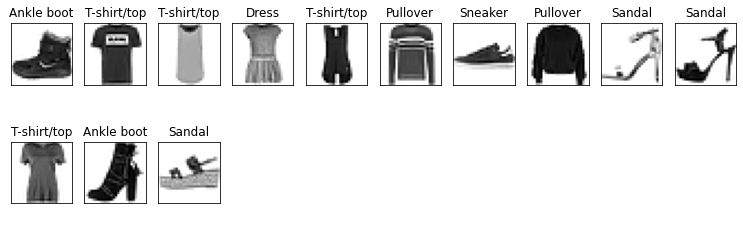

In [ ]:
my_plot(in_train[:13], out_train[:13])

## Model in Keras

In [ ]:
model = tf.keras.Sequential(layers = [
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(500, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax') 

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',     #SGD(lr=0.1),
              metrics=['accuracy'])

model.fit(in_train, out_train, batch_size=60, epochs=10, validation_split=0.2) 



Epoch 1/10
800/800 [==============================] - 8s 9ms/step - loss: 0.5021 - accuracy: 0.8226 - val_loss: 0.3835 - val_accuracy: 0.8615
Epoch 2/10
800/800 [==============================] - 8s 10ms/step - loss: 0.3733 - accuracy: 0.8640 - val_loss: 0.3759 - val_accuracy: 0.8679
Epoch 3/10
800/800 [==============================] - 8s 10ms/step - loss: 0.3343 - accuracy: 0.8781 - val_loss: 0.3551 - val_accuracy: 0.8733
Epoch 4/10
800/800 [==============================] - 7s 9ms/step - loss: 0.3087 - accuracy: 0.8856 - val_loss: 0.3348 - val_accuracy: 0.8783
Epoch 5/10
800/800 [==============================] - 8s 10ms/step - loss: 0.2896 - accuracy: 0.8930 - val_loss: 0.3280 - val_accuracy: 0.8830
Epoch 6/10
800/800 [==============================] - 7s 9ms/step - loss: 0.2747 - accuracy: 0.8982 - val_loss: 0.3211 - val_accuracy: 0.8838
Epoch 7/10
800/800 [==============================] - 8s 10ms/step - loss: 0.2585 - accuracy: 0.9037 - val_loss: 0.3162 - val_accuracy: 0.8826
Ep

## Testing Set

In [ ]:
model.evaluate(in_test, out_test) 

313/313 [==============================] - 1s 3ms/step - loss: 0.3400 - accuracy: 0.8794


[0.3400428593158722, 0.8794000148773193]

In [ ]:
probs = model.predict(in_test)
preds = probs.argmax(axis=1)
preds

313/313 [==============================] - 1s 3ms/step


array([9, 2, 1, ..., 8, 1, 5])

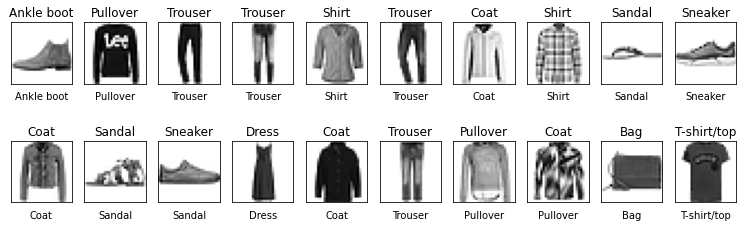

In [ ]:
my_plot(in_test[:20],out_test[:20], preds[:20])